# Computing the Entropy of an Image

__~ Anish Sachdeva__

__DTU/2K16/MC/013__

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pprint
import cv2
from typing import List

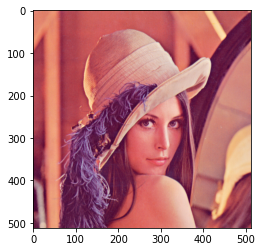

In [12]:
# Creating a histogram from a given Image channel
I = cv2.imread('../data/images/lenna.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
plt.imshow(I)

In [33]:
# frequency distribution function
def pixel_frequency_channel(channel: np.ndarray) -> np.ndarray:
    return np.array([(channel == value).sum() for value in range(256)])

In [34]:
dist_red = pixel_frequency_channel(I[:, :, 0])
dist_green = pixel_frequency_channel(I[:, :, 1])
dist_blue = pixel_frequency_channel(I[:, :, 2])

<BarContainer object of 256 artists>

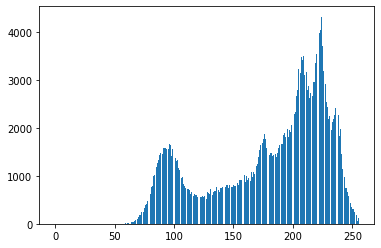

In [35]:
# distributin of red values
plt.bar([i for i in range(256)], dist_red)

<BarContainer object of 256 artists>

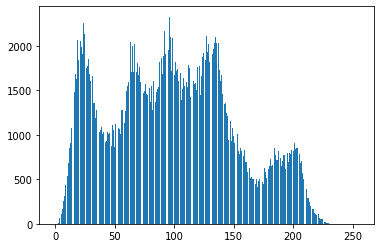

In [36]:
# distributin of green values
plt.bar([i for i in range(256)], dist_green)

<BarContainer object of 256 artists>

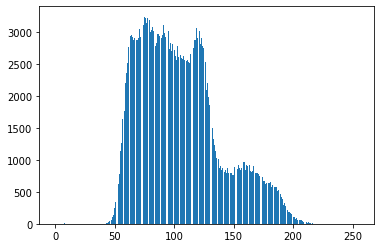

In [37]:
# distributin of blue values
plt.bar([i for i in range(256)], dist_blue)

### Entropy of a Single Pixel Value ($p_i$)

$$
H(p_i) = - P(p_i | D) \lg{P(p_i | D)}
$$

where $P(p_i | D)$ is the probability of that pixel value given the distribution

In [38]:
def entropy_pixel(value: int, dist: List[int]) -> float:
    prob = dist[value] / sum(dist)
    return - prob * np.log2(prob)

In [39]:
entropy_pixel(100, dist_red)

0.04073352013837572

In [65]:
# entropy of entire channel
def entropy_channel(channel: np.ndarray) -> float:
    dist = pixel_frequency_channel(channel)
    prob = dist / dist.sum()
    prob = prob[prob > 0]
    return (-prob * np.log2(prob)).sum()

In [66]:
# red channel entropy
entropy_channel(I[:, :, 0])

7.253102357429206

In [67]:
# green channel entropy
entropy_channel(I[:, :, 1])

7.594037916342683

In [68]:
# blue channel entropy
entropy_channel(I[:, :, 2])

6.9684269460085915

In [162]:
def probability_dist(I):
    return np.histogramdd(np.ravel(I), bins = 256)[0] / I.size

In [179]:
def entropy_image(J: np.ndarray) -> float:
    marg = probability_dist(J)
    marg = marg[marg > 0]
    return -(marg * np.log2(marg)).sum()

In [180]:
entropy_image(I)

7.7501974797431625

### KL-Divrgence (Kullback Leibler Divergence)
$$
KL(P_1, P_2) = \sum_{x} P_1(x) \log_2{\frac{P_1(x)}{P_2(x)}}
$$

In [102]:
def kl_divergence_images(I, J):
    epsilon = 1e-10
    p = probability_dist(I) + epsilon
    q = probability_dist(J) + epsilon
    return np.where(p != 0, p * np.log2(p / q), 0).sum()

In [103]:
kl_divergence_images(I, I)

0.0

### KL Divergence betwen Noisy and Noise free image
We will add salt and pepper noise in our standard Lenna Image at varying degrees and see how adding such noiseaffets the KL Divergence

#### Salt and Pepper Noise
$$
I(x, y) = \begin{cases}
    P_0 & 0 \leq P[I(x, y)] \leq \frac{d}{2} \\
    P_{255} & \frac{d}{2} \leq P[I(x, y)] \leq d \\
    I(x, y) & \text{otherwise}
\end{cases}
$$

In [124]:
# salt and pepper noise function
def salt_and_pepper_noise(I: np.ndarray, d: float) -> np.ndarray:
    J = I.copy()
    m, n , _ = I.shape
    prob = np.random.rand(m, n)
    J[prob < d / 2] = [0, 0, 0]
    J[(d / 2 < prob) & (prob < d)] = [255, 255, 255]
    return J

In [139]:
J = salt_and_pepper_noise(I, .1)

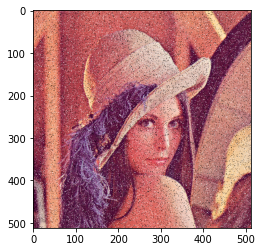

In [140]:
plt.imshow(J)

In [132]:
kl_divergence_images(I, J)

0.18608838425512528

### Computing the KL Divergence with different values for salt and Pepper Noise

In [142]:
# different noise factors
D = np.arange(0, 1.01, 0.01)
D

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [143]:
kl_divs = [kl_divergence_images(I, salt_and_pepper_noise(I, d)) for d in D]

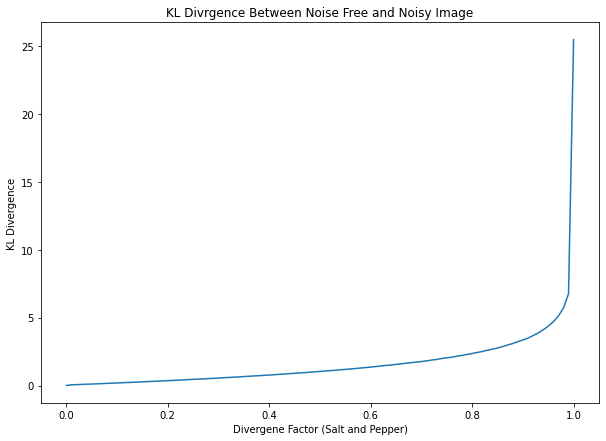

In [149]:
plt.figure(figsize=(10, 7))
plt.plot(D, kl_divs)

plt.title('KL Divrgence Between Noise Free and Noisy Image')
plt.xlabel('Divergene Factor (Salt and Pepper)')
plt.ylabel('KL Divergence')

plt.show()

### Computing Change in Entropy as Noise is Added

In [181]:
# noise factor
D

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [182]:
# entropy as a function of noise
E = [entropy_image(salt_and_pepper_noise(I, d)) for d in D]

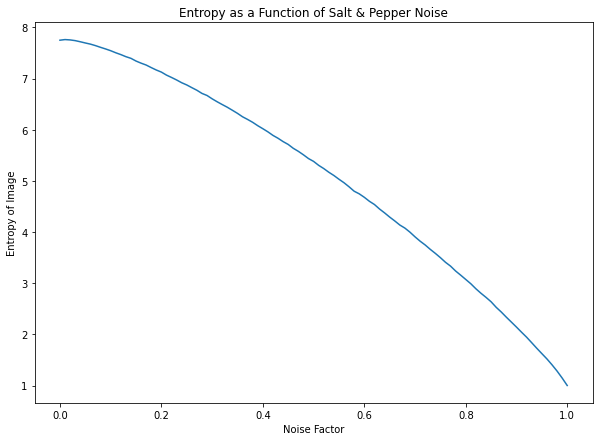

In [186]:
plt.figure(figsize=(10, 7))

plt.plot(D, E)

plt.title('Entropy as a Function of Salt & Pepper Noise')
plt.xlabel('Noise Factor')
plt.ylabel('Entropy of Image')

plt.show()